# Threshold correlations and copulas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Bivariate normal distribution

Full-sample correlation: 0.799


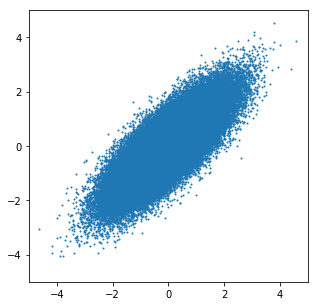

In [2]:
n = 100000
rho = 0.8
z1 = np.random.normal(0,1,n)
z2 = rho*z1 + np.sqrt(1-rho**2)*np.random.normal(0,1,n) # Cholesky decomposition
plt.figure(figsize=[5,5])
plt.scatter(z1,z2,s=1)
plt.xlim(-5,5)
plt.ylim(-5,5)
r,pval = stats.pearsonr(z1,z2)
print("Full-sample correlation: {0:.3f}".format(r))

p = 0.50; sub-sample correlation, z1<z(p) & z2<z(p): 0.596


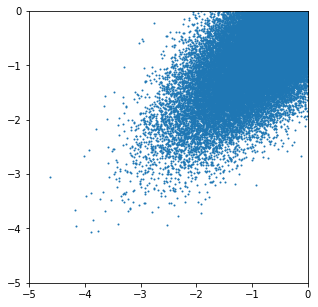

In [3]:
p = 0.5
zp = stats.norm.ppf(p)
z1s = z1[(z1<zp) & (z2<zp)]
z2s = z2[(z1<zp) & (z2<zp)]   # sub-sample selection, only obs for which z1 and z2 are both < zp
plt.figure(figsize=[5,5])
plt.scatter(z1s,z2s, s=1)
plt.xlim(-5,zp)
plt.ylim(-5,zp)
# plt.savefig('Norm_p_5.pdf')
r,pval = stats.pearsonr(z1s,z2s)
print("p = {0:.2f}; sub-sample correlation, z1<z(p) & z2<z(p): {1:.3f}".format(p,r))

**Threshold correlations, bivariate normal distribution, $\rho = 0.8$:**
* Correlation drops from 0.8 to 0.6 when taking only negative $(z_1,z_2)$.
* Correlation drops from 0.8 to 0.4 when taking only observations with $(z_1,z_2) < (z_{0.05},z_{0.05})$.

## Bivariate Student's t distribution:

Full sample correlation: 0.796


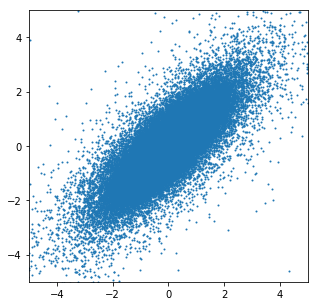

In [4]:
d = 4.0
s = np.sqrt(np.random.chisquare(d,size=n)/(d-2))
t1 = z1/s
t2 = z2/s    # method to simulate bivariate t: see Christoffersen, p. 200
plt.figure(figsize=[5,5])
plt.scatter(t1,t2, s=1)
plt.xlim(-5,5)
plt.ylim(-5,5)
r,pval = stats.pearsonr(t1,t2)
print("Full sample correlation: {0:.3f}".format(r))

p = 0.50; sub-sample correlation, t1<t(p) & t2<t(p): 0.715


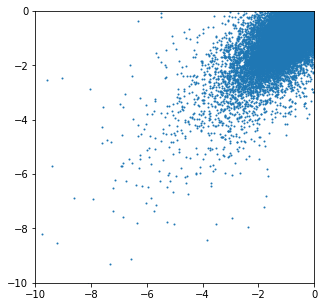

In [5]:
p = 0.5
scale = np.sqrt((d-2)/d)
tp = scale*stats.t.ppf(p,d)
t1s = t1[(t1<tp) & (t2<tp)]
t2s = t2[(t1<tp) & (t2<tp)]
plt.figure(figsize=[5,5])
plt.scatter(t1s,t2s, s=1)
plt.xlim(-10,tp)
plt.ylim(-10,tp)
#plt.savefig('t_p_50.pdf')
r,pval = stats.pearsonr(t1s,t2s)
print("p = {0:.2f}; sub-sample correlation, t1<t(p) & t2<t(p): {1:.3f}".format(p,r))

**Threshold correlations, bivariate Student's t(4) distribution, $\rho = 0.8$:**
* Correlation drops from 0.8 to 0.7 when taking only negative $(z_1,z_2)$.
* Correlation drops from 0.8 to 0.7 when taking only observations with $(z_1,z_2) < (t_{0.05},t_{0.05})$.

# Probability integral transforms and copula

## Normal distribution

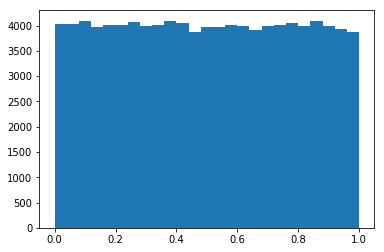

In [6]:
u1 = stats.norm.cdf(z1)
m,p,bins = plt.hist(u1, bins=25)

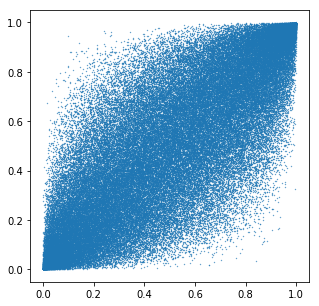

In [7]:
u2 = stats.norm.cdf(z2)
plt.figure(figsize=[5,5])
plt.scatter(u1,u2, s=0.1)
plt.show()

* Distribution of probability integral transforms $u_t = \Phi(z_t)$ is uniform between [0,1].
* Scatter plot of $(u_{1t},u_{2t})$ illustrates their joint distribution = normal copula.

## Student's t(d) distribution

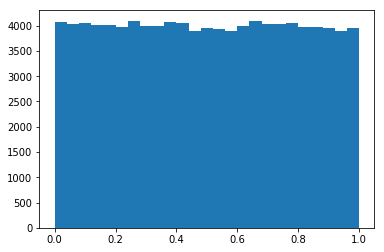

In [8]:
u1 = stats.t.cdf(t1,d, scale = scale)
m,p,bins = plt.hist(u1, bins=25)

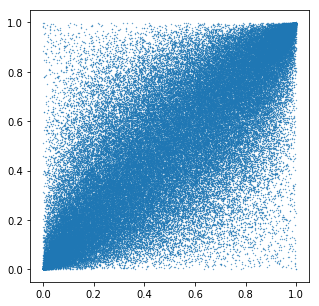

In [9]:
u2 = stats.t.cdf(t2,d, scale = scale)
plt.figure(figsize=[5,5])
plt.scatter(u1,u2, s=0.1)
plt.show()

* Distribution of probability integral transforms $u_t = F_{\tilde{t}(d)}(z_t,d)$ is uniform between [0,1].
* Scatter plot of $(u_{1t},u_{2t})$ illustrates their joint distribution = Student's $t$ copula.